## Extract bubble from simulations

In [1]:
import os,sys
sys.path.remove('/home/dpirvu/DarkPhoton/hmvec-master')
sys.path.append('/home/dpirvu/python_stuff/')
sys.path.append('/home/dpirvu/project/prefactor')
sys.path.append('/home/dpirvu/project/prefactor/bubbles_codes/')

from plotting import *
from bubble_tools import *
from experiment import *
from celluloid import Camera

%matplotlib inline


In [2]:
def beautify(ax, ttl=None, bb=None):
    try:
        len(ax)
    except:
        ax = [ax]
    for ai, aa in enumerate(ax):
        aa.grid(which='both', ls=':', color='lightgray', alpha=0.7)
        aa.tick_params(direction='in', which='both', top=True, right=True)
        #aa.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
        aa.xaxis.set_label_coords(0.5, -0.15)
        aa.yaxis.set_label_coords(-0.15, 0.5)
        aa.xaxis.label.set_color('k')
        aa.yaxis.label.set_color('k')
        aa.tick_params(axis='x', colors='k')
        aa.tick_params(axis='y', colors='k')
        aa.tick_params(direction='in', which='both', bottom=None, left=None, top=None, right=None)
        aa.spines['left'].set_color('k')
        aa.spines['right'].set_color('k')
        aa.spines['top'].set_color('k')
        aa.spines['bottom'].set_color('k')
        aa.legend(title=ttl, bbox_to_anchor=bb, frameon=False, handlelength=1.5, labelspacing=0.3, columnspacing=0.6)
    return ax

def beautify_anim(ax, ttl=None, bb=None):
    try:
        len(ax)
    except:
        ax = [ax]
    for ai, aa in enumerate(ax):
        aa.grid(which='both', ls=':', color='lightgray', alpha=0.7)
        aa.tick_params(direction='in', which='both', top=True, right=True)
        aa.xaxis.set_label_coords(0.5, -0.15)
        aa.yaxis.set_label_coords(-0.15, 0.5)
        aa.xaxis.label.set_color('k')
        aa.yaxis.label.set_color('k')
        aa.tick_params(axis='x', colors='k')
        aa.tick_params(axis='y', colors='k')
        aa.tick_params(direction='in', which='both', bottom=None, left=None, top=None, right=None)
        aa.spines['left'].set_color('k')
        aa.spines['right'].set_color('k')
        aa.spines['top'].set_color('k')
        aa.spines['bottom'].set_color('k')
    return ax


1.0 0.3 10.0 0.525 0 100 1.0000000840229193

a=0.00 << 1/T=0.10
Tg^2=0.90, T=10.00 << ω=643.40
1 << T=10.00 << g^{-2}=11.11



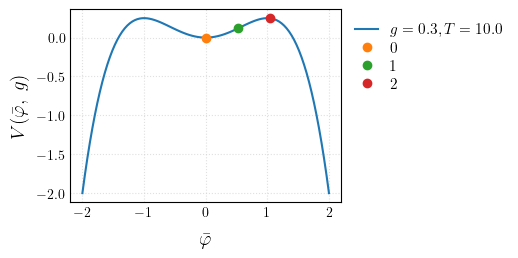

In [4]:
if True:
    philist = np.linspace(-2., 2., 100)
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.5))

    for tmp in range(len(tempList)):
        gg, temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, gg, m2, temp])
        print(m2, gg, temp, round(sigmafld, 4), minSim, maxSim, right_Vmax)

     #   ax.plot(philist, Vfree(philist, gg), label=labl(gg, temp))
     #   for nn in np.linspace(0, 2, 3):
     #       ax.plot(nn*sigmafld, Vfree(nn*sigmafld, gg), 'o', label=r'${:.0f}$'.format(nn))

        ax.plot(philist, V(philist, gg), label=labl(gg, temp))
        for nn in np.linspace(0, 2, 3):
     #       ax.plot(right_Vmax + nn*sigmafld, V(right_Vmax + nn*sigmafld, gg), 'o', label=r'${:.0f}$'.format(nn))
            ax.plot(nn*sigmafld, V(nn*sigmafld, gg), 'o', label=r'${:.0f}$'.format(nn))

        print('')
        print('a={:.2f} << 1/T={:.2f}'.format(dx, 1./temp))
        print('Tg^2={:.2f}, T={:.2f} << ω={:.2f}'.format(temp*(gg**2.), temp, dk*nLat/2))
        print('1 << T={:.2f} << g^{{-2}}={:.2f}'.format(temp, 1./gg**2.))
        print('')

    ax.set_xlabel(r'$\bar{\varphi}$')
    ax.set_ylabel(r'$V(\bar{\varphi},\; g)$')
    beautify(ax, bb=(1,1))
    plt.savefig('./plots/potential.pdf')
    plt.show()


In [33]:
tmp=0
gg, temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
exp_params = np.asarray([nLat, gg, m2, temp])
print('Experiment', exp_params)

tlist1 = np.arange(0, nTimeMAX, 1)
tlist2 = np.arange(0, nTimeMAX, 5)

sim = 8
path2sim      = sim_location(*exp_params, sim)
real, outcome = get_realisation(nLat, sim, phieq, path2sim)
real[np.isnan(real)] = 0.
nC, nT, nN    = np.shape(real)

fld, mom, grd = real[0], real[1], real[2]
print('Simulation, duration:', sim, nC, nN, nT)


Experiment [1.024e+03 3.000e-01 1.000e+00 1.000e+01]
Simulation, duration: 8 3 1024 769


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


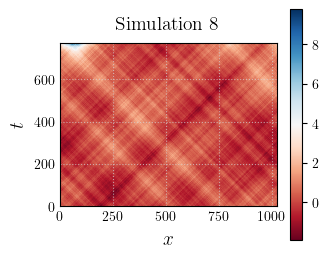

In [34]:
fig, ax = plt.subplots(1, 1, figsize = (3.5, 3))
ext = [0, nN, 0, nT]
im  = plt.imshow(fld, interpolation='none', extent=ext, origin='lower', cmap='RdBu')#, norm=matplotlib.colors.LogNorm())
clb = plt.colorbar(im, ax = ax)
plt.title(r'${{\rm Simulation}} \;{:.0f}$'.format(sim))
plt.xlabel(r'$x$')
plt.ylabel(r'$t$')
ax = beautify(ax)
plt.show()

#energy_data = np.sum(0.5*mom**2. + 0.5*grd**2. + Vfree(fld, gg), axis=-1)
energy_data = np.sum(0.5*mom**2. + 0.5*grd**2. + V(fld, gg), axis=-1)
EMT_data    = np.sum(mom * grd, axis=-1)
stdEMT0     = np.std(mom[0] * grd[0])


In [46]:
fftfld_intime = np.array([np.fft.fft(fld[tt,:], axis=-1)/nLat for tt in range(0, nnrg//10, 1)])
fftfld = np.nanmean(np.abs(fftfld_intime)**2., axis=0)
fftmom_intime = np.array([np.fft.fft(mom[tt,:], axis=-1)/nLat for tt in range(0, nnrg//10, 1)])
fftmom = np.nanmean(np.abs(fftmom_intime)**2., axis=0)


(2.168404344971009e-19+0j)


/home/dpirvu/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


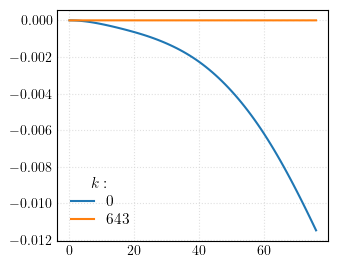

In [47]:
fig, ax = plt.subplots(1, 1, figsize = (3.5, 3))
for ki, kk in enumerate([0, nLat//2]):
#for ki, kk in enumerate([nLat//2]):
    plt.plot(fftfld_intime[:, kk], label=r'${:.0f}$'.format(round(dk*kk,0)))#, ls=['-', ':'][ki])
print(fftfld_intime[0, nLat//2])
ax = beautify(ax, ttl=r'$k:$')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


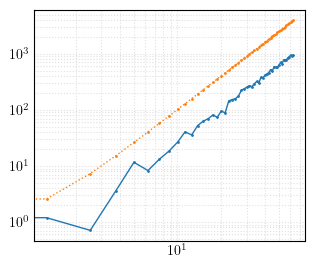

In [48]:
fig, ax = plt.subplots(1, 1, figsize = (3.5, 3))
plt.plot(klist[(klist>=0)&(klist<dk*nLat//20)], (fftmom/fftfld)[(klist>=0)&(klist<dk*nLat//20)], ls='-', lw=1, marker='o', ms=1)
plt.plot(klist[(klist>=0)&(klist<dk*nLat//20)], w2(tmp,m2)[(klist>=0)&(klist<dk*nLat//20)], ls=':', lw=1, marker='o', ms=1)
ax = beautify(ax)
plt.yscale('log')
plt.xscale('log')
plt.show()

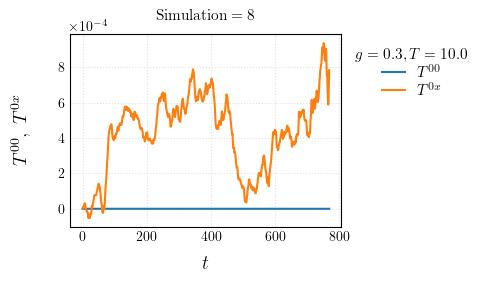

In [38]:
tlist = np.arange(len(energy_data))
#try: nnrg = np.argwhere(np.isnan(energy_data)).flatten()[0]
try: nnrg = np.argwhere(energy_data==0.).flatten()[0]
except: nnrg = len(tlist)+1

tcut, emtcut, tencut = tlist[:nnrg], EMT_data[:nnrg], energy_data[:nnrg]
emtcut = (emtcut - emtcut[0]) / emtcut[0]
tencut = (tencut - tencut[0]) / tencut[0]

fig, ax = plt.subplots(1,1, figsize = (3.5,2.5))
ax.plot(tcut, tencut, label=r'$T^{00}$', ls='-')#, marker='o', ms=1)
ax.plot(tcut, emtcut, label=r'$T^{0x}$', ls='-')#, marker='o', ms=1)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$T^{00}, \; T^{0x}$')
ax.set_title(r'${{\rm Simulation}}={:.0f}$'.format(sim), fontsize=11)
beautify(ax, bb=(1,1), ttl=labl(gg, temp))
#ax.axvline(nLat, ls='-', color='k', lw=0.5)
ax.ticklabel_format(axis='y', style='scientific', scilimits=[0.,0.])
plt.show()


In [41]:
allcolors = ['#377eb8', '#ff7f00', 'forestgreen', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']


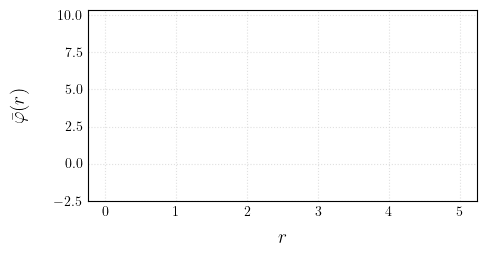

In [45]:
if True:
    fig, ax = plt.subplots(1,1, figsize = (5.,2.7))
    camera = Camera(fig)
    nT, nN = np.shape(fld)
    for tind, tt in enumerate(np.arange(0, nT, 2)):

        ls = plt.plot(np.arange(nN)*dx, fld[tt], ls='-', color=allcolors[0], lw=1)
        ax.axhline(0., ls=':', color='k', lw=0.5)
        ax.set_xlabel(r'$r$')
        ax.set_ylabel(r'$\bar{\varphi}(r)$')
        beautify_anim(ax)
        plt.legend(ls, [r'$t = {:.1f}$'.format(round(tt*dx,1))], loc=1,\
                  frameon=False, handlelength=1.5, labelspacing=0.3, columnspacing=0.6)
        plt.tight_layout()
        camera.snap()
    animation = camera.animate(interval = 0.0001);
    animation.save('./plots/animation_simulation_unbounded.gif', writer = 'imagemagick')


In [64]:
if False:
    for tmp in range(1):
        gg, temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, gg, m2, temp])

        # 0 for field; 1 for momentum 
        find = 0
        # modes to plot:
        aa, bb = 1, knyq-1
        # time steps to plot

        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, maxSim))
        tlist, PSfld1 = ALL_powspec1[0][:], ALL_powspec1[1][:, find, :, aa:bb]
        del ALL_powspec1

        fig, ax = plt.subplots(1,1, figsize = (5.,2.7))
        camera = Camera(fig)
        for tind, tt in enumerate(tlist[:-2]):
            curve = np.nanmean(PSfld1[:,tind], axis=0)
            curve/=pspec(tmp,m2,gg,temp)[aa:bb]

            plt.plot(klist[aa:bb], curve, ls='-', color=allcolors[tmp], alpha=0.4, lw=1)

            curve = gaussian_filter1d(curve, 4, mode='nearest')
            if tind==0: curve0 = curve
            if tind==len(tlist)//4: curve1 = curve
            if tind==len(tlist)*2//4: curve2 = curve
            if tind==len(tlist)*3//4: curve3 = curve

            slice = plt.plot(klist[aa:bb], curve, ls='-', color='k', lw=1)
            plt.plot(klist[aa:bb], curve0, ls='-', color='k', lw=0.5)
            if tind>len(tlist)//4:
                plt.plot(klist[aa:bb], curve1, ls='-', color='k', lw=0.5)
            if tind>len(tlist)*2//4:
                plt.plot(klist[aa:bb], curve2, ls='-', color='k', lw=0.5)
            if tind>len(tlist)*3//4:
                plt.plot(klist[aa:bb], curve3, ls='-', color='k', lw=0.5)

            ax.axhline(1., ls=':', color='k', lw=1)
            ax.set_xlim((klist[aa]*0.9, klist[bb-1]*1.1))
            ax.set_xscale('log')
            ax.set_xlabel(r'$k$')
            ax.set_ylabel(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 / \left|\bar{\varphi}_k(0)\right|^2 \right\rangle $')
            beautify_anim(ax)
            ax.legend(slice, [r'$t = {:.1f}$'.format(round(tt*dx,1))], loc=1)
            plt.tight_layout()
            camera.snap()
        animation = camera.animate(interval = 0.05);
        animation.save('./plots/animation_powespec_tevol'+batch_params(*exp_params)+'.gif', writer = 'imagemagick')


In [65]:
if True:
    for tmp in range(1):
        gg, temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, gg, m2, temp])
        print(gg, temp, sigmafld, minSim, maxSim, right_Vmax)

        # 0 for field; 1 for momentum 
        for find in [0,1]:
            # modes to plot:
            aa, bb = 1, knyq//5
            # time steps to plot
            tstep = 100
            # if tind not in np.array([0,2,7,27,46]): continue

            ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, maxSim))
            tlist, PSfld1 = ALL_powspec1[0][::tstep], ALL_powspec1[1][:, find, ::tstep, aa:bb]
            del ALL_powspec1

            fig, ax = plt.subplots(1,1, figsize = (5.,3.))

            if find==0: thps = pspec(tmp,m2,gg,temp)[aa:bb]
            elif find==1: thps = pspec(tmp,m2,gg,temp)[aa:bb]*w2(tmp,m2)[aa:bb]

            for tind, tt in enumerate(tlist):
                if tind==0: plt.plot(klist[aa:bb], thps, ls='-', color='k', lw=0.5)

                lab = r'${:.1f}$'.format(round(tt*dx,1))
                curve = np.nanmean(PSfld1[:,tind], axis=0)
                plt.plot(klist[aa:bb], curve, ls='-', lw=1, label=lab)

               # curve = gaussian_filter1d(curve, 4, mode='nearest')
               # plt.plot(klist[aa:bb], curve, ls='-')

            h, l = ax.get_legend_handles_labels() # Extracting handles and labels
            handles = [plt.plot([],marker="", ls="")[0]] + h
            labels = [r'$t:$'] + l  # Merging labels
            beautify(ax)
            leg = ax.legend(handles, labels, ncol=len(tlist)+1, loc='lower left', frameon=False, handlelength=1., labelspacing=0.3, columnspacing=0.6)
            ax.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
            ax.set_xscale('log')
            if find==0: ax.set_yscale('log')
            ax.set_ylabel([r'$\left\langle \left|\delta\bar{\varphi}_k(t)\right|^2 \right\rangle$',
                          r'$\left\langle \left|\delta\bar{\Pi}_k(t)\right|^2 \right\rangle$'][find])
            ax.set_xlabel(r'$k$')
            plt.tight_layout()
            plt.savefig('./plots/powespec_tevol.pdf')
            plt.show()


0.1 50.0 0.4466855380829406 0 100 1.0000000840229193


FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/dpirvu/prefactor/x1024_g0.1000_m21.0000_T50.0000_minSim0_maxSim100_powspec.npy'

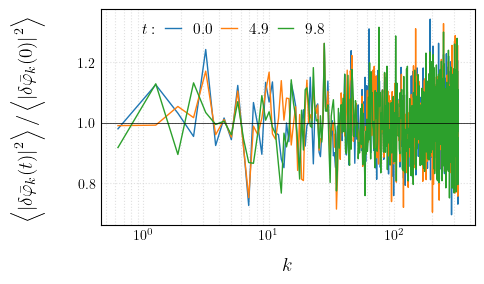

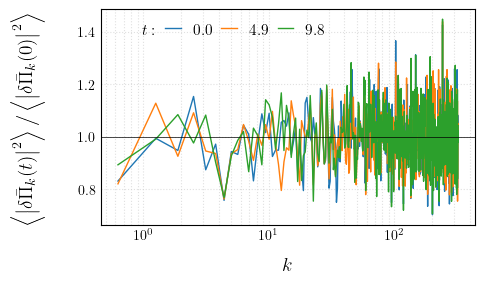

In [24]:
if True:
    for tmp in range(1):
        gg, temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, gg, m2, temp])

        # 0 for field; 1 for momentum 
        for find in [0,1]:
            # modes to plot:
            aa, bb = 1, knyq-1
            # time steps to plot
            tstep = 100
            # if tind not in np.array([0,2,7,27,46]): continue

            ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, minSim, maxSim))
            tlist, PSfld1 = ALL_powspec1[0][::tstep], ALL_powspec1[1][:, find, ::tstep, aa:bb]
            del ALL_powspec1

            fig, ax = plt.subplots(1,1, figsize = (5.,3.))

            if find==0: thps = pspec(tmp,m2,gg,temp)[aa:bb]
            elif find==1: thps = pspec(tmp,m2,gg,temp)[aa:bb]*w2(tmp,m2)[aa:bb]

            for tind, tt in enumerate(tlist):
                curve = np.nanmean(PSfld1[:,tind], axis=0)

                lab = r'${:.1f}$'.format(round(tt*dx,1))
                plt.plot(klist[aa:bb], curve/thps, ls='-', lw=1, label=lab)

               # curve = gaussian_filter1d(curve, 4, mode='nearest')
               # plt.plot(klist[aa:bb], curve, ls='-')

            h, l = ax.get_legend_handles_labels() # Extracting handles and labels
            handles = [plt.plot([],marker="", ls="")[0]] + h
            labels = [r'$t:$'] + l  # Merging labels
            beautify(ax)
            leg = ax.legend(handles, labels, ncol=len(tlist)+1, loc=2, frameon=False, handlelength=1., labelspacing=0.3, columnspacing=0.6)

            ax.set_xscale('log')
            ax.axhline(1, ls='-', color='k', lw=0.5)
            ax.set_ylabel([r'$\left\langle \left|\delta\bar{\varphi}_k(t)\right|^2 \right\rangle \Big/ \left\langle \left|\delta\bar{\varphi}_k(0)\right|^2 \right\rangle$',\
                          r'$\left\langle \left|\delta\bar{\Pi}_k(t)\right|^2 \right\rangle \Big/ \left\langle \left|\delta\bar{\Pi}_k(0)\right|^2 \right\rangle $'][find])
            ax.set_xlabel(r'$k$')
            plt.tight_layout()
            plt.savefig('./plots/powespec_normalized_tevol.pdf')
            plt.show()


In [66]:
if True:
    for tmp in range(1):
        gg, temp, sigmafld, minSim, maxSim, right_Vmax = get_model(tmp)
        exp_params = np.asarray([nLat, gg, m2, temp])

        ALL_toten = np.load(toten_tlist_file(*exp_params, minSim, maxSim))
        ALL_emt   = np.load(emt_tlist_file(*exp_params, minSim, maxSim))
        tlist, enfld, emtfld = ALL_toten[0], ALL_toten[1], ALL_emt[1]

        for sim, (momentum, energy) in enumerate(zip(emtfld, enfld)):
            if sim%40!=0: continue

            try: nnrg = np.argwhere(np.isnan(energy)).flatten()[0]
            except: nnrg = len(tlist)+1

            tcut, emtcut, tencut = tlist[:nnrg], momentum[:nnrg], energy[:nnrg]
            emtcut = (emtcut - emtcut[0]) / emtcut[0]
            tencut = (tencut - tencut[0]) / tencut[0]

            fig, ax = plt.subplots(1,1, figsize = (3.5,2.5))
            ax.plot(tcut, tencut, label=r'$T^{00}$', ls='-', marker='o', ms=1)
            ax.plot(tcut, emtcut, label=r'$T^{0x}$', ls='-', marker='o', ms=1)

            ax.set_xlabel(r'$t$')
            ax.set_ylabel(r'$T^{00}, \; T^{0x}$')
            ax.set_title(r'${{\rm Simulation}}={:.0f}$'.format(sim), fontsize=11)
            beautify(ax, bb=(1,1), ttl=labl(gg, temp))
            plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/dpirvu/prefactor/x1024_g0.1000_m21.0000_T50.0000_minSim0_maxSim100_toten.npy'